In [1]:
push!(LOAD_PATH, joinpath(@__DIR__, "../../../lib"));

In [2]:
using OrdinaryDiffEq

In [3]:
include("two-level2.jl");

In [4]:
const sys0 = TwoLevel();

In [5]:
function get_dri(E0, ω, Ωx, Ωz, ϕ0)
    function dri(t)
        return Ωx * cos(ω * t) / 2, 0, (E0 + Ωz * cos(ω * t + ϕ0)) / 2
    end
end

get_dri (generic function with 1 method)

  2.876165 seconds (20.96 M allocations: 1.150 GiB, 14.52% gc time, 99.70% compilation time)


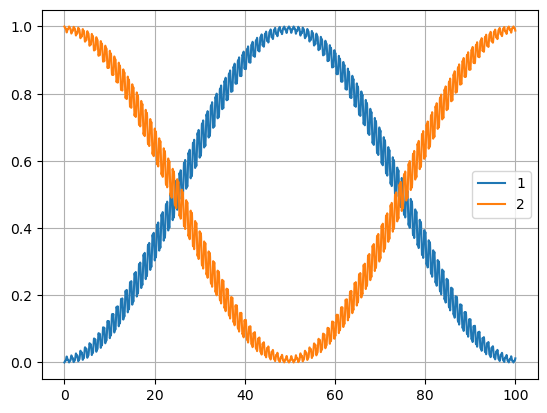

In [6]:
ts, ψs = @time evolve(sys0, get_dri(2π * 2, 2π * (1 + 4e-3), 2π * 0.2, 2π * 0.2, 0), spindown(basis_2), range(0, 100, 10001), alg=Vern9());
plot(ts, [abs2(ψ.data[1]) for ψ in ψs], label="1")
plot(ts, [abs2(ψ.data[2]) for ψ in ψs], label="2")
legend()
grid()

  0.032706 seconds (661.45 k allocations: 27.684 MiB)


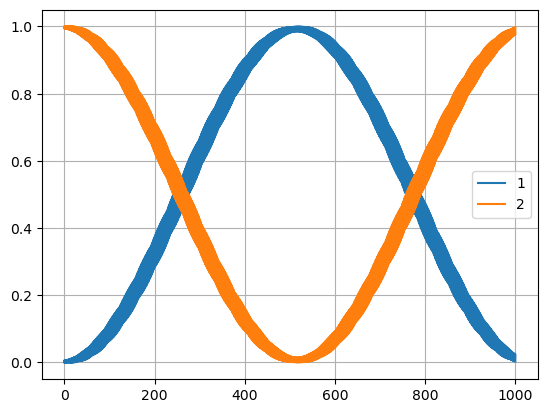

In [7]:
ts, ψs = @time evolve(sys0, get_dri(2π * 2, 2π * (2/3 + 1.9e-3), 2π * 0.2, 2π * 0.2, 0), spindown(basis_2), range(0, 1000, 10001), alg=Vern9());
plot(ts, [abs2(ψ.data[1]) for ψ in ψs], label="1")
plot(ts, [abs2(ψ.data[2]) for ψ in ψs], label="2")
legend()
grid()

  0.052323 seconds (955.26 k allocations: 45.397 MiB)


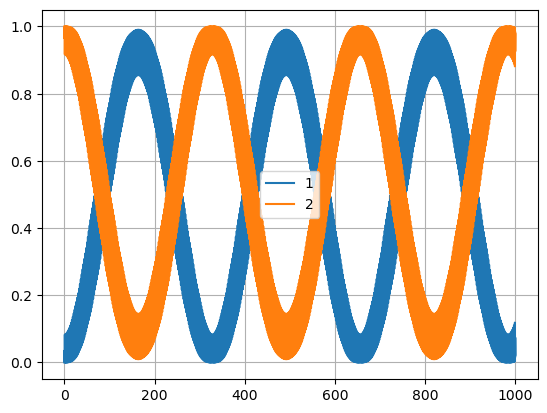

In [8]:
ts, ψs = @time evolve(sys0, get_dri(2π * 2, 2π * (1/2 + 9e-3), 2π * 0.5, 2π * 0.5, 0), spindown(basis_2), range(0, 1000, 100001), alg=Vern9());
plot(ts, [abs2(ψ.data[1]) for ψ in ψs], label="1")
plot(ts, [abs2(ψ.data[2]) for ψ in ψs], label="2")
legend()
grid()